<a href="https://colab.research.google.com/github/Adamantev/DataSet/blob/main/%D0%A0%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BB%D0%BA%D0%B0V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [30]:
from fastai.vision.all import *

In [49]:
pathTraining =  Path('/content/gdrive/MyDrive/DataSet/DataSet/Training')
pathTest =  Path('/content/gdrive/MyDrive/DataSet/DataSet/Test')

In [51]:
pathTraining.ls()
pathTest.ls()

(#2) [Path('/content/gdrive/MyDrive/DataSet/DataSet/Test/Bad'),Path('/content/gdrive/MyDrive/DataSet/DataSet/Test/Norm')]

In [64]:
filesTraining = get_image_files(pathTraining)
filesTest = get_image_files(pathTest)

In [65]:
len(filesTraining)


214

In [58]:
#len(filesTest)

10

In [73]:
filesTraining[0],filesTest[2]


(Path('/content/gdrive/MyDrive/DataSet/DataSet/Training/Norm/img_thermal_1637761638400.jpg'),
 Path('/content/gdrive/MyDrive/DataSet/DataSet/Test/Bad/img_thermal_1637837172121.jpg'))

In [74]:
IRI_data_Trianing = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=parent_label)

In [75]:
IRI_data_Trianing = IRI_data.new(item_tfms=Resize(224),batch_tfms=aug_transforms(mult=2))


In [78]:
dls_Training = IRI_data_Trianing.dataloaders(pathTraining)


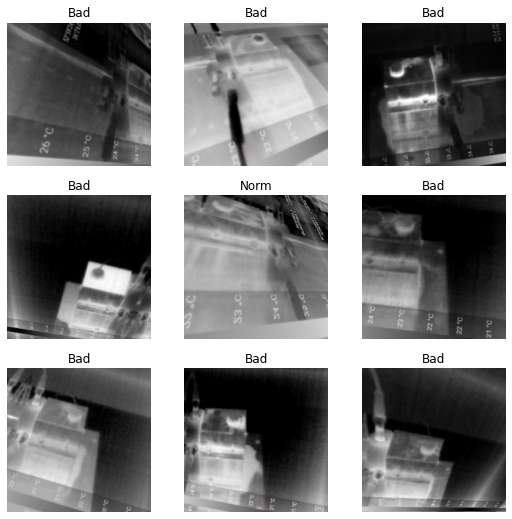

In [79]:
dls.show_batch()


Обучение

In [80]:
learn = cnn_learner(dls_Training,resnet34,metrics=error_rate,pretrained=True,lr=0.00145)


In [83]:
learn.loss_func


FlattenedLoss of CrossEntropyLoss()

In [84]:
learn.opt_func

<function fastai.optimizer.Adam>

SuggestedLRs(valley=0.0012022644514217973)

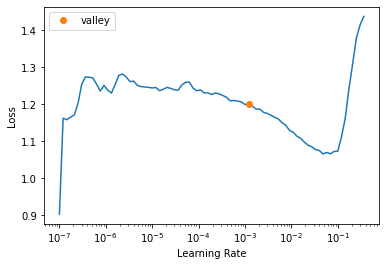

In [85]:
learn.lr_find()


In [86]:
learn.fine_tune(50)

epoch,train_loss,valid_loss,error_rate,time
0,1.244424,1.414118,0.666667,00:08


epoch,train_loss,valid_loss,error_rate,time
0,1.374801,1.021406,0.523810,00:08
1,1.369133,0.860625,0.523810,00:08
2,1.286318,0.804049,0.452381,00:08
3,1.251564,0.766618,0.404762,00:09
4,1.185618,0.724417,0.404762,00:08
5,1.165561,0.695367,0.357143,00:08
6,1.207848,0.685101,0.428571,00:09
7,1.178949,0.721080,0.404762,00:08
8,1.164015,0.750976,0.452381,00:08
9,1.146906,0.822996,0.476190,00:08


In [106]:
learn.predict(pathTest/'/content/gdrive/MyDrive/DataSet/DataSet/Test/Norm/img_thermal_1637761638400.jpg')


('Norm', TensorBase(1), TensorBase([4.6943e-05, 9.9995e-01]))

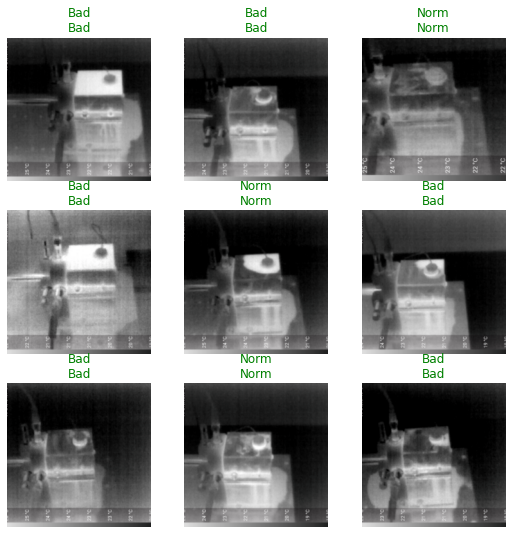

In [107]:
learn.show_results()

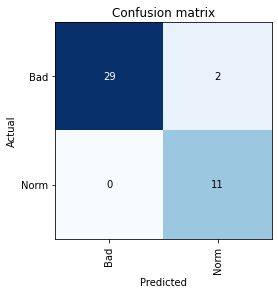

In [108]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [104]:
upp, low = interp.confusion_matrix()
tn, fp = upp[0], upp[1]
fn, tp = low[0], low[1]
print(tn, fp, fn, tp)

29 2 0 11


In [109]:
sensitivity = tp/(tp + fn)
sensitivity

1.0

In [110]:
specificity = tn/(fp + tn)
specificity

0.9354838709677419

In [111]:
ppv = tp/(tp+fp)
ppv

0.8461538461538461

In [112]:
npv = tn/(tn+fn)
npv

1.0

In [113]:
acc = (tp+tn)/(tp+tn+fp+fn)
acc

0.9523809523809523

In [115]:
print('Точность', acc * 100, '%')

Точность 95.23809523809523 %
